# Finding the Cassan Mass Function in s and q

The Cassan mass function is a power law descriped as such:
$$f(\log_{10}{a},\log_{10}{M})= \frac{d^2N}{d\log{a}d\log{M}} = f_0\left(\frac{M}{M_0}\right)^{\alpha},$$

where $f_0=10^{-0.62}$, $M_0=95\,M_\oplus$, and $\alpha=-0.79$.

To convert this from $M$ and $a$, to $s$ and $q$, we need to:
* take the gulls output with, `q`, `s`, `m2`, and `a`, drawn from a log uniform distribution in $a$ and $M$.
* $weight = f(\log_{10}{a}, \log_{10}{M})$ (there will be some normalization we need to consider).
* histogram $s$ and $q$.

In [22]:
# a programatic version of the Cassan et al. (2012) planet distribution
# paper: "One or more bound planets per Milky Way star from microlensing observations"
# https://hal.science/tel-01088218/document
import numpy as np
import pandas as pd

def Cassan_weight(M: np.array, mass_break=5.2):
    """Calculate the Cassan et al. (2012) weight for a planet of mass M (in M_Earth) and semi-major axis a (in AU)."""
    f0 = -0.62
    M0 = 95.0
    alpha = -0.73
    
    if not isinstance(M, np.ndarray) and not isinstance(M, list):
        M = np.array([M])
    elif not isinstance(M, np.ndarray) and np.isscalar(M):
        M = np.array(M)
    elif not isinstance(M, np.ndarray) and isinstance(M, pd.Series):
        M = M.to_numpy()

    f = np.zeros_like(M, dtype=float)
    if mass_break is not None:
        f[M < mass_break] = f0 * (M[M < mass_break] / M0)**alpha
        f[M >= mass_break] = f0 * (mass_break / M0)**alpha * (M[M >= mass_break] / mass_break)**(-0.17)
    else:
        f = f0 * (M / M0)**alpha
    
    return f

Plot it, just to get a feel for the function.

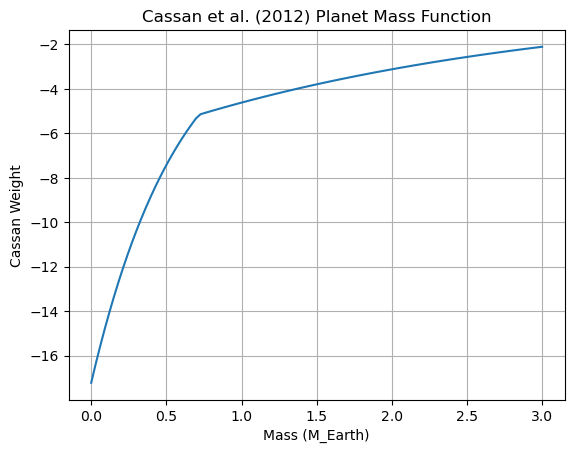

In [25]:
# Plotting the function to see if it looks right with mass break at 5.2 M_Earth
import matplotlib.pyplot as plt

masses = np.logspace(0, 3, 100)  # Masses from 1 to 1000 M_Earth
weights = Cassan_weight(masses)
plt.plot(np.log10(masses), weights)
plt.xlabel('Mass (M_Earth)')
plt.ylabel('Cassan Weight')
plt.title('Cassan et al. (2012) Planet Mass Function')
plt.grid(True)
plt.show()

Building a faux data frame for demonstrative purposes.

In [10]:
import pandas as pd

# obviously this is a much grosser step with the real data, but for the logic from here on is the same
df = pd.DataFrame([[1.0, 1.0, 1.0, 1.0]], columns =['mass (M_E)', 'a (au)', 'q', 's'])

Use the `Cassan_weight()` function we wrote to find what the reweighting, functional programming style.

In [7]:
df['weight'] = df.apply(lambda row: Cassan_weight(row['mass (M_E)']), axis=1)

Let's plot it and see if it worked.

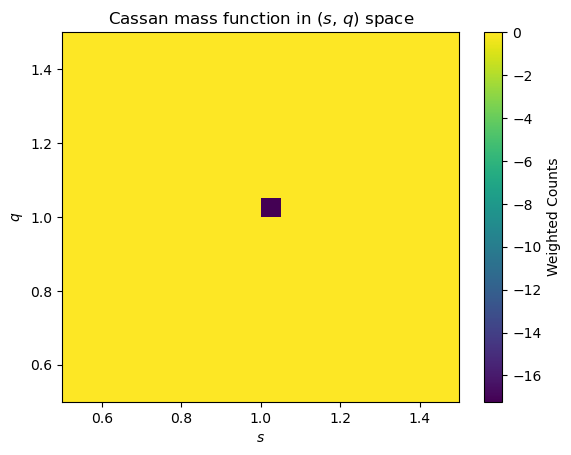

In [ ]:
import matplotlib.pyplot as plt

plt.hist2d(df['s'], df['q'], weights=df['weight'], bins=20, cmap='viridis')
plt.xlabel(r'$\log_{10}{s}$')
plt.ylabel(r'$\log_{10}{q}$')
plt.colorbar(label='Weighted Counts')
plt.title('Cassan mass function in ($s$, $q$) space')
plt.show()

So, if the normalisation is right